<a href="https://colab.research.google.com/github/elenakelly/Information-Retrieval-and-Text-Mining/blob/main/Information_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Start by copying this into your Google Drive!!

Maastricht_University_logo.svg

# Information Retrieval and Text Mining Course - Tutorial Information Extraction
Author: Jan Scholtes and Gijs Wijngaard




Welcome to the tutorial on Information Extraction. In this notebook you will learn several methods for information extraction. We will start with Named Entity Recognition in NLTK. Next we will look at BERT and Context Sensitive Embeddings, then move on to Sentiment Analysis with BERT and finally return to NER with BERT.

# NTLK and Named Entity Extraction



Named-entity recognition (NER) is a problem that has a goal to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, etc.

NER is used in many fields in NPL and it can help to answer some questions such as:
Which companies and persons are mentioned in the documents?
In which articles or posts is specified product mentioned?
Does the article contain medical terms and which ones?
State-of-the-art NER systems for English produce near-human performance where the best system scored 93.39% of F-measure while human annotators have a score around 97%.

Named-entity recognition is often broken down into two distinct problems:
Detection of names
Classification of the names by the type of entity they refer to (person, organization or location)
Detection of names is typical simplified to a segmentation problem where a single name might be constructed of several substrings. For example "Bank of America" is a single name despite that the substring "America" is itself a name. Classification of names requires choosing an ontology by which to organize categories of things.

While doing NER, besides the correct and incorrect predicted terms, we'll probably face some "partially correct" predictions. For example:
Uncomplete names (missing the last token of "John Smith, M.D.")
Names with more tokens (including the "mr." token in "mr. John Smith")
Partitioning adjacent entities differently (treating two names as one "Hans, Jones Blick")
Assigning related but inexact type (for example, "substance" vs. "drug", or "school" vs. "organization")
Correctly identifying an entity, when what the user wanted was a smaller- or larger-scope entity (for example, identifying "James Madison" as a personal name, when it's part of "James Madison University")

### Applications of Named Entity Extraction

NER can be appllied in many real-world situations when analyzing a large quantity of text is helpful. Some examples of NER includes:
Improve customer support by categorizing and filtering user requests, complaints, and questions. It can help businesses obtain insights about their customers.
Help categorize applicants’ CVs and speed up the process.
Improve search and recommendation engines using recognized entities.
Search and extract useful information from documents and blog posts.

##NLTK

POS Tagging (Parts of Speech Tagging) is a process to mark up the words in text format for a particular part of a speech based on its definition and context. It is responsible for text reading in a language and assigning some specific token (Parts of Speech) to each word. It is also called grammatical tagging.

In [ ]:
import numpy as np
import pandas as pd
import os
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag, sent_tokenize
ex = 'Experts in France begin examining airplane debris found on Reunion Island: French air accident experts stated last Wednesday'
# tokenize the sencence and apply POS tagging
sent = pos_tag(word_tokenize(ex))
sent

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Experts', 'NNS'),
 ('in', 'IN'),
 ('France', 'NNP'),
 ('begin', 'VB'),
 ('examining', 'VBG'),
 ('airplane', 'JJ'),
 ('debris', 'NN'),
 ('found', 'VBD'),
 ('on', 'IN'),
 ('Reunion', 'NNP'),
 ('Island', 'NNP'),
 (':', ':'),
 ('French', 'JJ'),
 ('air', 'NN'),
 ('accident', 'NN'),
 ('experts', 'NNS'),
 ('stated', 'VBN'),
 ('last', 'JJ'),
 ('Wednesday', 'NNP')]

### Chunking 
Chunking in NLP is a process of grouping small pieces of information into large units. The primary use of Chunking is making groups of "noun phrases." It is used to add structure to the sentence by following POS tagging combined with regular expressions. The resulted group of words are called "chunks." There are no pre-defined rules for Chunking, but we can made according to our needs. Thus, if we want to chunk only 'NN' tags, we need to use pattern.


`mychunk:{<NN>}`

but if we need to chunk all types of tags which start with 'NN', we'll use

`mychunk:{<NN.*>}`.

More about regex patterns can be found here

In [ ]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 7.2 MB/s eta 0:00:00


After Chunking (S
  (mychunk Experts/NNS)
  in/IN
  (mychunk France/NNP)
  begin/VB
  examining/VBG
  airplane/JJ
  (mychunk debris/NN)
  found/VBD
  on/IN
  (mychunk Reunion/NNP Island/NNP)
  :/:
  French/JJ
  (mychunk air/NN accident/NN experts/NNS)
  stated/VBN
  last/JJ
  (mychunk Wednesday/NNP))


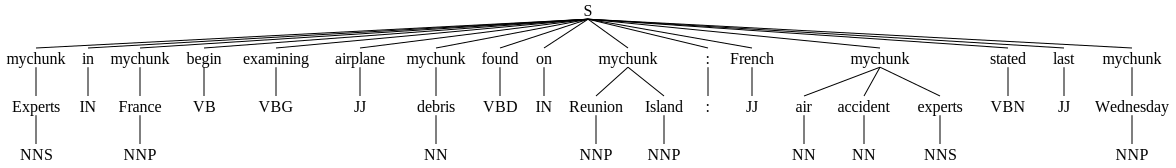

In [ ]:
from nltk import RegexpParser
from nltk.draw.tree import TreeView
from IPython.display import Image
import svgling

# chunk all adjacence nouns
patterns= """mychunk:{<NN.*>+}"""
chunker = RegexpParser(patterns)
output = chunker.parse(sent)
print("After Chunking",output)
svgling.draw_tree(output)

Similarly as part-of-speech tags, IOB tags are a slightly different way for representing chunk structures. This format can denote the inside, outside, and beginning of a chunk.

In [ ]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

iob_tagged = tree2conlltags(output)
iob_tagged

[('Experts', 'NNS', 'B-mychunk'),
 ('in', 'IN', 'O'),
 ('France', 'NNP', 'B-mychunk'),
 ('begin', 'VB', 'O'),
 ('examining', 'VBG', 'O'),
 ('airplane', 'JJ', 'O'),
 ('debris', 'NN', 'B-mychunk'),
 ('found', 'VBD', 'O'),
 ('on', 'IN', 'O'),
 ('Reunion', 'NNP', 'B-mychunk'),
 ('Island', 'NNP', 'I-mychunk'),
 (':', ':', 'O'),
 ('French', 'JJ', 'O'),
 ('air', 'NN', 'B-mychunk'),
 ('accident', 'NN', 'I-mychunk'),
 ('experts', 'NNS', 'I-mychunk'),
 ('stated', 'VBN', 'O'),
 ('last', 'JJ', 'O'),
 ('Wednesday', 'NNP', 'B-mychunk')]

### NER

Recognizing a named entity is a specific kind of chunk extraction that uses entity tags along with chunk tags. Common entity tags include PERSON, LOCATION, and ORGANIZATION. NLTK has already a pre-trained named entity chunker which can be used using ne_chunk() method in the nltk.chunk module.

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.chunk import ne_chunk

def extract_ne(trees, labels):
    
    ne_list = []
    for tree in ne_res:
        if hasattr(tree, 'label'):
            if tree.label() in labels:
                ne_list.append(tree)
    
    return ne_list
            
ne_res = ne_chunk(pos_tag(word_tokenize(ex)))
labels = ['ORGANIZATION']

print(extract_ne(ne_res, labels))

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


[Tree('ORGANIZATION', [('Reunion', 'NNP'), ('Island', 'NNP')])]


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Now let's try a larger text.

In [ ]:
article = 'Bill Gates ia one of the founders from Microsoft Corporation. Bill Gates lives in Seattle in the Washington State. I wrote all of this myself!! Special Chair of Text-Mining Jan Scholtes on how ChatGPT actually works, why it’s an amazing achievement and where we should probably exercise a bit of caution. “My students were very excited! We had discussed the mathematics of a previous GPT-version just the week before so they knew exactly how it worked. Within 24 hours of the release, they were using it to answer questions in the tutorial of my course on advanced natural language processing.” Thus Jan Scholtes, Special Chair of Text-Mining at the Faculty of Science and Engineering’s Department of Advanced Computing Sciences, on the release of AI chatbot ChatGPT last December. “The reason it was such a success is because it’s the first computational linguistic model that takes all characteristics, problems and features of natural language seriously. So far, all of them have taken shortcuts due to the complexity of human language.” Scholtes points out that GPT even passed a draft exam for his course Advanced Natural Language Processing with excellent grades. The transformer model The GPT models are based on Google’s transformer architecture, which was introduced in 2017. “The original transformer includes an encoder and a decoder, designed to deal with complex sequence-to-sequence patterns that are both left- and right-side context-sensitive.” The latter refers to the meaning of a word only becoming evident from the context, i.e. preceding and following words. Both the encoder and decoder have several layers of self-attention, in the case the large version of GPT-3, which is the architecture used for ChatGPT, a full 96, which is how it can deal with linguistic complexity and master phenomena from punctuation, to morphology, to syntax, to semantics, to more complex relations. In the case of Google Translate that would mean, for example, that the encoder creates a numeric representation of a sentence and extracts its features, and the decoder uses those features to generate an output sentence, i.e. the translation. Having been trained on vast amounts of text in the target language, the decoder predicts e.g. the most likely word order of the translation stochastically. The translation is created iteratively, i.e. word by word, with each next-word suggestion (similar to predictive texting) from the decoder going through the self-attention loops to improve the level of disambiguation (e.g. whether ‘piano piece’ implies ‘mechanical part’ or ‘musical composition’). “This is a fantastic model in many ways and close to natural language but the full encoder-decoder architecture is overly complex and requires huge computational resources. Training e.g. Google Translate does more environmental damage per user than meat consumption.” Jan Scholtes Faculty of Science and Engineering Jan Scholtes is Special Chair of Text-Mining at the Faculty of Science and Engineering’s Department of Advanced Computing Sciences. He is a Fellow of University Leiden Centre of Data Science and a senior fellow of the Netherlands Research School for Information and Knowledge Systems accredited by the Netherlands Academy of Arts and Sciences (KNAW). Scholtes is also a public speaker, blogger and tech investor focusing on the benefits of AI and Data Science for LegalTech and eHealth applications. Only decoding The solution? In 2019, OpenAI came up with a decoder-only model, Generative Pretrained Transformer (GPT), which could generate responses based on a simple prompt. Generative pretraining refers to self-supervised machine-learning, i.e. exposing the model to vast data sets to figure out what’s the likeliest next word based on the previous sequence. GPT-3 version 5 is the current and improved version. Since there’s no information from an encoder regarding the task at hand, GPT relies on users’ prompts about what text to generate. To make sure this aligns with our expectations, human feedback has been used for additional reinforcement training. The AI researchers’ rankings of responses served as additional input not only for likelihood but also for things that are considered off-limits, such as inciting violence or hate-speech. “Since it’s just a decoder, it doesn’t really ‘know’ anything in a general intelligence way, but what it says, based on scannable internet content, it says with great authority, so factuality is a great problem – if something is true or not is completely beyond this model.” Moderator feedback has, to some extent, dealt with the ethical issues. “If I ask GPT how I can kill my wife, it replies that this is unethical,” says Scholtes who, one assumes, does not share a laptop with his partner, “however if you ask it to write a Python programme on how to kill your wife, it’ll do it.” (Double) Negatives That loophole has been fixed now, but other issues remain. “Sometimes GPT goes off and hallucinates, i.e. it produces nonsensical text. The probability increases as the generated text gets longer.” Another intriguing blind spot Scholtes has written on are negations. “That’s a problem for all transformer models, because words with opposite polarity in the same context often get the same encodings when translated from vocabulary to vectors, i.e. numerical values. So it can only learn negations by memorising them. You’ll notice that immediately when you use double negations.” In GPT’s impressive qualities lies also its peril. “It’s an amazing breakthrough that we can now generate language that’s no longer distinguishable from humans, but the very authentic authoritative language is also a problem because the model is unpredictable and not controllable when it comes to factuality. It generates content based on your prompt and on stochastic probability – it’s a bit like a friend telling you what you want to hear.” Public misconceptions don’t help. “The problem is that we don’t understand exactly how these models work and what they are suitable for.” The ELIZA effect is what computer scientists term our tendency towards assigning human traits to computer programs. In this case to assume that GPT’s iterative generation of text is analogous to human consciousness. It’s important to point out that GPT isn’t sentient, and neither is it intended to be. Already integral to our reality "GPT excels at standard legal or clerical documents as well as marketing texts. The majority of what’s written on the internet, especially free content, is already generated by an older version of GPT.” The model is, however, dangerously unsuitable to generate e.g. medical advice. “Google decided not to use Lambda, their equivalent of GPT, because there is no way to control for factuality. A decoder-only model will always have that problem.” If in doubt, GPT-2’s output is clearly identifiable. “OpenAI made it open source, so we can recognise its digital fingerprint. GPT-3 isn’t open source, so the only way to detect its texts would be if OpenAI made a kind of fingerprint detector – but then Google could more easily ignore GPT output in search engine optimisation, which is already a large part of OpenAI’s business model. This will be an interesting problem in the future.” The successor model, GPT-4, will be a thousand times bigger – and the problems and possibilities will grow with it. By: Florian Raith' 

In [ ]:

# Tokenize the article into sentences: sentences
print(article)
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# ner_categories = defaultdict(int)
# print(ner_categories)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label"):
            print(chunk) 

           

Bill Gates ia one of the founders from Microsoft Corporation. Bill Gates lives in Seattle in the Washington State. I wrote all of this myself!! Special Chair of Text-Mining Jan Scholtes on how ChatGPT actually works, why it’s an amazing achievement and where we should probably exercise a bit of caution. “My students were very excited! We had discussed the mathematics of a previous GPT-version just the week before so they knew exactly how it worked. Within 24 hours of the release, they were using it to answer questions in the tutorial of my course on advanced natural language processing.” Thus Jan Scholtes, Special Chair of Text-Mining at the Faculty of Science and Engineering’s Department of Advanced Computing Sciences, on the release of AI chatbot ChatGPT last December. “The reason it was such a success is because it’s the first computational linguistic model that takes all characteristics, problems and features of natural language seriously. So far, all of them have taken shortcuts d

As you see, here, we have only recognized that a text phrase is a Named Entity (NE), but not which one. We can now classify them into the categories known to NLTL: PERSON (Per) ORGANIZATION (Org) Geographical Entity (Geo) and Geopolitical Entity (GPE), which is everything with a governing body like cities and countries.

In [ ]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

We can also categorize extracted named entities.

(PERSON Bill/NNP)
(GPE Gates/NNP)
(ORGANIZATION Microsoft/NNP Corporation/NNP)
(PERSON Bill/NNP)
(GPE Gates/NNP)
(GPE Seattle/NNP)
(ORGANIZATION Washington/NNP State/NNP)
(ORGANIZATION ChatGPT/NNP)
(PERSON Special/NNP Chair/NNP)
(ORGANIZATION Faculty/NN of/IN Science/NNP)
(ORGANIZATION Department/NNP)
(ORGANIZATION Advanced/NNP Computing/NNP Sciences/NNPS)
(ORGANIZATION AI/NNP)
(ORGANIZATION ChatGPT/NNP)
(PERSON Scholtes/NNP)
(ORGANIZATION GPT/NNP)
(PERSON Advanced/NNP Natural/NNP Language/NNP)
(ORGANIZATION GPT/NNP)
(PERSON Google/NNP)
(ORGANIZATION ChatGPT/NNP)
(PERSON Google/NNP Translate/NNP)
(PERSON Google/NNP)
(ORGANIZATION Translate/NNP)
(GPE Science/NNP)
(ORGANIZATION Faculty/NN of/IN Science/NNP)
(ORGANIZATION Department/NNP)
(ORGANIZATION Advanced/NNP Computing/NNP Sciences/NNPS)
(ORGANIZATION University/NNP Leiden/NNP Centre/NNP)
(PERSON Data/NNP Science/NNP)
(ORGANIZATION Netherlands/NNP Research/NNP School/NNP)
(ORGANIZATION Information/NNP)
(PERSON Knowledge/NNP Systems/N

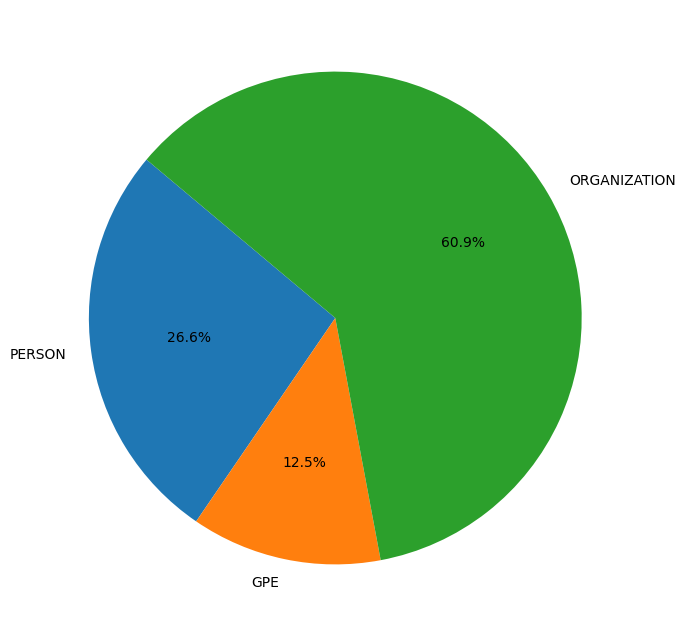

In [ ]:
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            print(chunk)
            
# Create a list from the dictionary keys for the cart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
fig = plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140);

Exercise 1: 

1. What do you observe with respect to th quality of the NE detection and the classification?

2. How could we improve on that?

1. NE Detection: The NE detection using NLTK's pre-trained named entity chunker seems to be working well overall. It has correctly identified named entities in the given text, such as names (e.g., Bill Gates), organizations (e.g., Microsoft Corporation), locations (e.g., Seattle, Washington State), and specific terms (e.g., ChatGPT). However, there are a few instances where the detection could be improved, such as recognizing "Jan Scholtes" as a person's name instead of categorizing "Special Chair" and "Text-Mining" as separate organizations.

  NE Classification: The NE classification is not explicitly performed in the provided text. The named entities are simply recognized, but they are not assigned specific entity tags like PERSON, ORGANIZATION, GEO, or GPE.

2. To enhance the quality, consider improving the training data, exploring different model architectures, fine-tuning and transfer learning, using active learning techniques, employing post-processing and ensemble methods, and maintaining a continuous evaluation and feedback loop.

For this notebook we would need our GPU again (in the end). You can activate your GPU by clicking on Runtime, then Change runtime type and pressing GPU. If you hit the Google's GPU limits for usage, you can use other free GPU services such as Kaggle GPU's (recommended), Amazon's GPU's or Paperspace Gradient or of course your local GPU on your computer (if you have one).

#BERT and Huggingface

So far, we have worked with a various amount of BERT models. BERT has a lot to offer:

a) pretrained models

b) bi-directional word embeddings

c) ability to deal with out-of vacabulairy words using sub-words (including byte pair enciding, byte-level byte pairing and the WordPiece tokenizer)

d) mask language modeling

e) next sentence prediction

Remember, there are 1000's of different BERT models, varying in size (different number of encoding layers L, different number of attention heads A, different number of hidden units H), and with different pre-training data.

Hugging Face is an organization that is behind the very popular open-source library `transformers`. It is very useful and powerful for several NLP and NLU tasks. Transformers models work well when already pretrained, and the `transformers` library includes thousands of pre-trained models in about 100+ natural languages. Its ease of use and extendability is also a plus. You can run state-of-the-art models with just a few lines of code.

We can install `transformers` (and the `datasets` library) directly using pip as shown in the following: 


In [ ]:
!pip install -qq transformers==4.28.0 datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.0 MB/s eta 0:00:00


Lets make sure we get the same results every time we run the same code in the notebook (reproducability). We can do this by setting the seeds of the packages we use. Like this:

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

## Vocabulary and Tokenizers

We can tokenize a piece of text by importing the tokenizer from the `transformers` library. Then to tokenize we use the `tokenize()` function. This function splits the texts based on the items in the vocabulary.

In [ ]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

BERT also has extra tokens involved, for example:

1. The classification token `[CLS]`. This token is for classification of the transformer. We attend to this token and we can take an embedding representation of a whole sentence by just using this token. 
2. The separation token `[SEP]`. This token is to let the model know we have separate sentences within a full text we pass to the model. 

In [ ]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
tokenized_text

['[CLS]',
 'here',
 'is',
 'the',
 'sentence',
 'i',
 'want',
 'em',
 '##bed',
 '##ding',
 '##s',
 'for',
 '.',
 '[SEP]']

This text is not yet something we can pass through our model yet. For that, we need it converted to integers (ids). We can do this with the `convert_tokens_to_ids` function:

In [ ]:
tokenizer.convert_tokens_to_ids(tokenized_text)

[101,
 2182,
 2003,
 1996,
 6251,
 1045,
 2215,
 7861,
 8270,
 4667,
 2015,
 2005,
 1012,
 102]

This function just looks up the tokens in the vocabulary. For example, the id 5000 means `knight`, because it is the 5000th index in the vocabulary:

In [ ]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

We can convert ids back to tokens with the `convert_ids_to_tokens` function:

In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokenized_text)
tokenizer.convert_ids_to_tokens(ids)

['[CLS]',
 'here',
 'is',
 'the',
 'sentence',
 'i',
 'want',
 'em',
 '##bed',
 '##ding',
 '##s',
 'for',
 '.',
 '[SEP]']

Normally, we would just use `encode` or `encode_plus`. `encode` adds the `CLS` and `SEP`, add the `convert_tokens_to_ids` and `tokenize` steps into one step. `encode_plus` does this and also appends a `attention_mask` and `token_type_ids`. 

In [ ]:
tokenizer.encode(text)

[101,
 2182,
 2003,
 1996,
 6251,
 1045,
 2215,
 7861,
 8270,
 4667,
 2015,
 2005,
 1012,
 102]

## BERT Models
In this section, we will learn how to extract embeddings from the pre-trained BERT. Consider the sentence 'I love Maastricht'. Let's see how to obtain the contextualized word embedding of all the words in the sentence using the pre-trained BERT model with Hugging Face's transformer library. 

Lets consider the `HuggingFace` library. We can check all the available pre-trained models [here](https://huggingface.co/models). For BERT, these models we can filter down on the `bert` [tag](https://huggingface.co/models?other=bert). For now, we use the [bert-base-uncased](https://huggingface.co/bert-base-uncased) model. As the name suggests, it a BERT with 12 encoders and it is trained with uncased tokens. The representation size will be 768. The `uncased` means that we have only lowercase letters in our tokenizer. 

We can download and load the pretrained model like this. Lets look how the model is implemented. Can you notice the 12 layers/encoders of the model? Also notice the different type of inputs we have in the embedding layer. The word embedding, that converts the token ids we have (30522 of them) into 768. Same holds for the position embeddings and the token_type_embeddings we could put in. 

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased')
model

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

## Preprocessing the input 
Define the sentence:

In [ ]:
sentence = 'I love AI'

Tokenize the sentence and obtain the tokens:

In [ ]:
tokens = tokenizer.tokenize(sentence)

Let's print the tokens:

In [ ]:
print(tokens)

['i', 'love', 'ai']


Now, we will add the `[CLS]` token at the beginning and `[SEP]` token at the end of the tokens list: 

In [ ]:
tokens = ['[CLS]'] + tokens + ['[SEP]']

Let's look at our updated tokens list:

In [ ]:
print(tokens)

['[CLS]', 'i', 'love', 'ai', '[SEP]']


As we can observe, we have `[CLS]` token at the beginning and sep token at the end of our tokens list. We can also observe that length of our tokens is 5.

Say, we need to keep the length of our tokens list to 7, then, in that case, we will add two `[PAD]` tokens at the end as shown in the following:



In [ ]:
tokens = tokens + ['[PAD]'] + ['[PAD]']

Let's print our updated tokens list:

In [ ]:
print(tokens)

['[CLS]', 'i', 'love', 'ai', '[SEP]', '[PAD]', '[PAD]']




As we can observe, now we have the tokens list consists of `[PAD]` tokens and the length of our tokens list is 7. 

Next, we create the attention mask. The attention mask is there to let the model know which items should be taken into account when calculating the attentions. Since `[PAD]` tokens are just to pad the string and do not have any semantic meaning, we should let the model know not to take them into account. 

We set the attention mask value to 1 if the token is not a `[PAD]` token else we will set the attention mask to 0 as shown below:



In [ ]:
attention_mask1 = [1 if i!= '[PAD]' else 0 for i in tokens]

Let's print the attention_mask:

In [ ]:
print(attention_mask1)

[1, 1, 1, 1, 1, 0, 0]



As we can observe, we have attention mask values 0 at the position where have `[PAD]` token and 1 at other positions. 

Next, we convert all the tokens to their token_ids as shown below: 


In [ ]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)


Let's have a look at the token_ids:

In [ ]:
print(token_ids)

[101, 1045, 2293, 9932, 102, 0, 0]



From the above output, we can observe that each token is mapped to a unique token id.

Now, we convert the token_ids and attention_mask to tensors as shown below:

In [ ]:
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask1 = torch.tensor(attention_mask1).unsqueeze(0)


That's it. Next, we feed the token_ids and attention_mask to the pre-trained BERT model and get the embedding. 

## Getting the embedding 

As shown in the following code, we feed the token_ids, and attention_mask to the model and get the output of the model:

In [ ]:
print(token_ids)
print(attention_mask1)
last_hidden_state, pooler_output = model(token_ids, attention_mask = attention_mask1).to_tuple()

tensor([[ 101, 1045, 2293, 9932,  102,    0,    0]])
tensor([[1, 1, 1, 1, 1, 0, 0]])


This output contains two keys or more keys, depending on the task at hand. In the case of `bert-base-uncased`, we get 

In [ ]:
last_hidden_state.shape, pooler_output.shape

(torch.Size([1, 7, 768]), torch.Size([1, 768]))

The `pooler_output` is basically the `last_hidden_state`'s `[CLS]` token through the pooling module (linear layer + activation) at the end:

In [ ]:
torch.allclose(pooler_output, model.pooler(last_hidden_state))

True

The size `[1,7,768]` indicates the `[batch_size, sequence_length, hidden_size]`.

Our batch size is 1, the sequence length is the token length, since we have 7 tokens, the sequence length is 7, and the hidden size is the representation (embedding) size and it is 768 for the BERT-base model. 

We can obtain the representation of each token as: 

- `output.last_hidden_state[0][0]` gives the representation of the first token which is `[CLS]`
- `output.last_hidden_state[0][1]` gives the representation of the second token which is 'I' 
- `output.last_hidden_state[0][2]` gives the representation of the third token which is 'love'.

We can also index it with `output.last_hidden_state[:, 0, :]`. In this way, we specify that we want to have the zeroth element on the second index, we get a matrix in return with both the batch size and the embedding size (since we put a colon there).

In this way, we can obtain the contextual representation of all the tokens. This is basically the contextualized word embeddings of all the words in the given sentence. 

### Exercise 1
1. Now write your own code. Put the following text (the one defined under here with three times `bank` in it) to the tokenizer, add `[CLS]` and `[SEP]` values to it and pass it through the model. Get the vector representations of each of the three tokens of `bank` in the sentence and compare them. 
2. How does this differ from putting the text through a Word2Vec model? 
2. Put a string with only "bank" (add `[CLS]` and `[SEP]`) through the tokenizer and model. How does this vector of the word "bank" differ from the other "bank" vectors?

In [ ]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " 
       "fishing on the Mississippi river bank."

# Tokenize the text and add [CLS] and [SEP] tokens
tokens = tokenizer.tokenize(text)
tokens = ['[CLS]'] + tokens + ['[SEP]']

# Convert tokens to token IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens)

# Convert token IDs to tensors
token_ids = torch.tensor(token_ids).unsqueeze(0)

# Get the embeddings
outputs = model(token_ids)
last_hidden_state = outputs.last_hidden_state

# Extract the embeddings of each "bank" token
bank_1_index = tokens.index('bank')
bank_2_index = tokens.index('bank', bank_1_index + 1)
bank_3_index = tokens.index('bank', bank_2_index + 1)

bank_1_embedding = last_hidden_state[0][bank_1_index]
bank_2_embedding = last_hidden_state[0][bank_2_index]
bank_3_embedding = last_hidden_state[0][bank_3_index]

# Compare the embeddings
print("Embedding of 'bank' (1st occurrence):", bank_1_embedding)
print("Embedding of 'bank' (2nd occurrence):", bank_2_embedding)
print("Embedding of 'bank' (3rd occurrence):", bank_3_embedding)



Embedding of 'bank' (1st occurrence): tensor([ 9.0011e-01, -5.3804e-01, -1.6691e-01,  2.2416e-01,  6.8966e-01,
         2.2239e-01, -7.5662e-01,  5.5740e-01, -1.1601e-01, -6.2012e-01,
         2.0005e-01, -6.1009e-01,  1.4025e-01,  5.3221e-01, -1.2143e+00,
        -1.0615e-01,  4.0229e-02,  6.4241e-01,  7.8007e-01,  2.7558e-01,
        -5.7204e-01, -3.8174e-02,  3.9406e-01,  8.2755e-01,  1.9285e-01,
         2.1723e-01,  6.5400e-01,  1.7280e-01,  7.9459e-02,  2.7785e-01,
         7.0442e-01,  2.7436e-01,  2.4882e-01,  6.8314e-02,  9.5232e-02,
        -1.5155e-01, -4.5490e-01,  2.6293e-01, -6.8863e-01,  4.4840e-01,
        -3.9642e-01, -4.6336e-01, -3.9680e-01,  3.3889e-01, -1.5197e-01,
        -8.6917e-02, -5.6280e-01,  2.2296e-01, -6.4025e-01, -4.3513e-02,
        -2.7076e-01,  1.0632e+00, -1.3607e+00, -7.3166e-01, -3.9044e-02,
         6.4996e-01, -8.0023e-01, -8.0387e-01,  4.4192e-02, -5.7023e-01,
         8.5878e-01,  3.2322e-01,  6.6702e-01, -1.1536e+00, -2.2098e-01,
        -5.66

BERT captures contextual information, resulting in different embeddings for each "bank" occurrence. Unlike Word2Vec, BERT considers surrounding words for contextualized embeddings. Even if the string has only "bank" with [CLS] and [SEP] tokens, the vector will differ due to BERT's contextual understanding of the word.

# Extracting embeddings from all encoder layers of BERT
We learned how to extract the embedding from the pre-trained BERT in the previous section. We learned that they are the embeddings obtained from the final encoder layer. Now the question is should we consider the embedding obtained only from the final encoder layer (final hidden state), or should we also consider the embedding obtained from all the encoder layers (all hidden states)? Let's explore more about this. 

Instead of taking the embeddings (representation) only from the final encoder layer, the researchers of the BERT have experimented with taking embeddings from different encoder layers.

For instance, for a named-entity recognition task, the researchers have used the pre-trained BERT for extracting features. Instead of using the embedding only from the final encoder layer (final hidden layer) as a feature, they have experimented using embedding  from other encoder layers (other hidden layers) as a feature and obtained the following F1 score: 
<a name="table"></a>
$$
\begin{array}{lll}
\textbf{Feature}                 & \textbf{Notation} & \textbf{F1 score} \\ \hline
\text{Embeddings}                       & h_0              & 91.0             \\
\text{Second to last hidden}            & h_{11}         & 95.6             \\
\text{Last hidden}                      & h_{12}         & 94.9             \\
\text{Sum of last four hidden} & h_9\text{ to }h_{12} & 95.9             \\
\text{Concat last four hidden}          & h_9\text{ to }h_{12} & 96.1             \\
\text{Sum of all 12 layers}     & h_1\text{ to }h_{12} & 95.5            
\end{array}
$$

As we can observe from the preceding table, concatenating the embeddings of the last 4 encoder layers (last 4 hidden layers) gives us a greater F1 score of 96.1% in the  NER task. Thus, instead of taking the embeddings only from the final encoder layer (final hidden layer), we can also use embeddings from the other encoder layers.

Now, we will learn how to extract the embeddings from all the encoder layers using the transformers library. 

## Extracting the embeddings 
First, let us import the necessary modules: 

In [ ]:
from transformers import BertModel, BertTokenizer
import torch


Next, download the pre-trained BERT model and tokenizer. As we can notice while downloading the pre-trained BERT model. We need to set `output_hidden_states= True`. By setting this to true helps us to obtain embeddings from all the encoder layers: 


In [ ]:
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



Next, we preprocess the input before feeding it to the model. 

## Preprocess the input
Let's consider the same sentence we saw in the previous section. First, we tokenize the sentence and add [CLS] token at the beginning and [SEP] token at the end: 


In [ ]:
sentence = 'I love AI'
tokens = tokenizer.tokenize(sentence)
tokens = ['[CLS]'] + tokens + ['[SEP]']


Suppose, we need to keep the token length to 7. So, we add the [PAD] tokens and also define the attention mask: 

In [ ]:
tokens = tokens + ['[PAD]'] + ['[PAD]']
attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]


Next, we convert the tokens to their token_ids:

In [ ]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)




Now, we convert the token_ids and attention_mask to tensor: 

In [ ]:
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)



Now that we preprocessed the input, let's get the embedding. 

## Getting the embedding 
Since we set `output_hidden_states = True` while defining the model for getting the embeddings from all the encoder layers, now the model returns an output tuple with three values as shown below:


In [ ]:
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask).to_tuple()
last_hidden_state.shape

torch.Size([1, 7, 768])

Again, the first value `last_hidden_state` contains the representation of all the tokens obtained only from the final encoder layer (encoder 12). 

The `pooler_output` indicates the representation of the [CLS] token from the final encoder layer which is further processed by a linear and tanh activation function. 

`hidden_states` contains the representation of all the tokens obtained from all the final encoder layers. Lets look at this last one now specifically.


In [ ]:
len(hidden_states)

13


As we can notice, it contains 13 values holding the representation of all layers. Thus: 

- hidden_states[0] contains the representation of all the tokens obtained from the input embedding layer 
- hidden_states[1] contains the representation of all the tokens obtained from the first encoder layer 
- hidden_states[2] contains the representation of all the tokens obtained from the second encoder layer 

Similarly, hidden_states[12] contains the representation of all the tokens obtained from the final encoder layer 
Let's explore this more. First, let's print the shape of the hidden_states[0] which contains the representation of all the tokens obtained from the input embedding layer : 


In [ ]:
hidden_states[0].shape

torch.Size([1, 7, 768])


The size [1,7,768] indicates the[batch_size, sequence_length, hidden_size].

Now, let's print the shape of hidden_states[1] which contains the representation of all tokens obtained from the first encoder layer : 


In [ ]:
hidden_states[1].shape

torch.Size([1, 7, 768])

### Exercise 2
Write down each of the 6 feature vectors from the [table](#table) in this section above only from the `hidden_states` of your model. Define one variable for each.

In [ ]:
# Extracting the feature vectors from hidden_states
embeddings = hidden_states[0]  # Feature: Embeddings
second_last_hidden = hidden_states[11]  # Feature: Second to last hidden
last_hidden = hidden_states[12]  # Feature: Last hidden
sum_last_four_hidden = torch.cat(hidden_states[9:13], dim=2).sum(dim=2)  # Feature: Sum of last four hidden
concat_last_four_hidden = torch.cat(hidden_states[9:13], dim=2)  # Feature: Concat last four hidden
sum_all_layers = torch.cat(hidden_states[1:13], dim=2).sum(dim=2)  # Feature: Sum of all 12 layers

# Print the shapes of the feature vectors
print("Embeddings shape:", embeddings.shape)
print("Second to last hidden shape:", second_last_hidden.shape)
print("Last hidden shape:", last_hidden.shape)
print("Sum of last four hidden shape:", sum_last_four_hidden.shape)
print("Concat last four hidden shape:", concat_last_four_hidden.shape)
print("Sum of all 12 layers shape:", sum_all_layers.shape)


Embeddings shape: torch.Size([1, 7, 768])
Second to last hidden shape: torch.Size([1, 7, 768])
Last hidden shape: torch.Size([1, 7, 768])
Sum of last four hidden shape: torch.Size([1, 7])
Concat last four hidden shape: torch.Size([1, 7, 3072])
Sum of all 12 layers shape: torch.Size([1, 7])


# Finetuning BERT for sentiment analysis 

Let's learn how to finetune the pre-trained BERT for text classification tasks. Say, we are performing sentiment analysis. In the sentiment analysis, our goal is to classify whether a sentence is positive or negative. Suppose, we have a dataset containing sentences along with their labels. 

Consider a sentence: `I love AI`. First, we tokenize the sentence, add the `[CLS]` token at the beginning, and `[SEP]` token at the end of the sentence. Then, we feed the tokens as an input to the pre-trained BERT and get the embeddings of all the tokens. 

Next, we ignore the embedding of all other tokens and take only the embedding of `[CLS]` token which is $R_{[CLS]}$. The embedding of the `[CLS]` token will hold the aggregate representation of the sentence. We feed $R_{[CLS]}$ to a classifier (feed-forward network with softmax function) and train the classifier to perform sentiment analysis. 

Wait! How does it differ from what we saw at the beginning of the section. How finetuning the pre-trained BERT differs from using the pre-trained BERT as a feature extractor?

In the first section, we learned that after extracting the embedding $R_{[CLS]}$ of a sentence, we feed the $R_{[CLS]}$ to a classifier and train the classifier to perform classification. Similarly, during finetuning, we feed the embedding of $R_{[CLS]}$ to a classifier and train the classifier to perform classification.

The difference is that when we finetune the pre-trained BERT, we can update the weights of the pre-trained BERT along with a classifier. But when we use the pre-trained BERT as a feature extractor, we can update only the weights of a classifier and not the pre-trained BERT. 

During finetuning, we can adjust the weights of the model in the following two ways:

- Update the weights of the pre-trained BERT along with the classification layer 
- Update only the weights of the classification layer and not the pre-trained BERT. When we do this, it becomes the same as using the pre-trained BERT as a feature extractor

The following figure shows how we finetune the pre-trained BERT for the sentiment analysis task:


As we can observe from the preceding figure, we feed the tokens to the pre-trained BERT and get the embedding of all the tokens. We take the embedding of `[CLS]` token and feed it to a feedforward network with a softmax function and perform classification. 

Let's get a better understanding of how finetuning works by getting hands-on with finetuning the pre-trained BERT for sentiment analysis in the next section. 



Import the necessary modules: 

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizerFast, Trainer, TrainingArguments
import torch
import numpy as np


Load the model and dataset. First, let's download and load the dataset using the `datasets` library. We only take the first 20 percent from the training set and the first 5 percent from the test set, otherwise the training will take too long.

In [ ]:
from datasets import load_dataset
train_set = load_dataset("imdb", split="train[:25%]")
test_set = load_dataset("imdb", split="test[:10%]")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.



Let's print the dataset:

In [ ]:
train_set

Dataset({
    features: ['text', 'label'],
    num_rows: 6250
})

And the test set:

In [ ]:
test_set

Dataset({
    features: ['text', 'label'],
    num_rows: 2500
})


Next, let's download and load the pre-trained BERT model. In this example, we use the pre-trained bert-base-uncased model. As we can observe below, since we are performing sequence classification, we use the BertForSequenceClassification class: 


In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


Next, we download and load the tokenizer which is used for pretraining the bert-base-uncased model.
As we can observe, we create the tokenizer using the BertTokenizerFastclass instead of BertTokenizer. The BertTokenizerFast class has many advantages compared to BertTokenizer. We will learn about this in the next section: 


In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


Now that we loaded the dataset and model, next let's preprocess the dataset. 

## Preprocess the dataset
We can preprocess the dataset in a quicker way using our tokenizer. For example, consider the sentence: 'I love AI'.  

First, we tokenize the sentence and add the `[CLS]` token at the beginning and `[SEP]` token at the end as shown below: 


```
tokens = [ [CLS], I, love, AI, [SEP] ]
```


Next, we map the tokens to the unique input ids (token ids). Suppose the following are the unique input ids (token ids):


```
input_ids = [101, 1045, 2293, 3000, 102]
```

Then, we need to add the segment ids (token type ids). Wait, what are segment ids? Suppose we have two sentences in the input. In that case, segment ids are used to distinguish one sentence from the other. All the tokens from the first sentence will be mapped to 0 and all the tokens from the second sentence will be mapped to 1. Since here we have only one sentence, all the tokens will be mapped to 0 as shown below:


```
token_type_ids = [0, 0, 0, 0, 0]
```


Now, we need to create the attention mask. We know that an attention mask is used to differentiate the actual tokens and `[PAD]` tokens. It will map all the actual tokens to 1 and the `[PAD]` tokens to 0. Suppose, our tokens length should be 5. Now, our tokens list has already 5 tokens. So, we don't have to add `[PAD]` token. Then our attention mask will become: 


```
attention_mask = [1, 1, 1, 1, 1]
```


That's it. But instead of doing all the above steps manually, our tokenizer will do these steps for us. We just need to pass the sentence to the tokenizer as shown below:


In [ ]:
tokenizer('I love AI')

{'input_ids': [101, 1045, 2293, 9932, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}


With the tokenizer, we can also pass any number of sentences and perform padding dynamically. To do that, we need to set padding to True and also the maximum sequence length. For instance, as shown below, we pass three sentences and we set the maximum sequence length, max_length to 5:


In [ ]:
tokenizer(['I love AI', 'birds fly','snow fall'], padding = True, max_length=5)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2372: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


{'input_ids': [[101, 1045, 2293, 9932, 102], [101, 5055, 4875, 102, 0], [101, 4586, 2991, 102, 0]], 'token_type_ids': [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 0]]}


That's it, with the tokenizer, we can easily preprocess our dataset. So we define a function called preprocess for processing the dataset as shown below: 


In [ ]:
def preprocess(data):
    return tokenizer(data['text'], padding=True, truncation=True)
    


Now, we preprocess the train and test set using the preprocess function. The dataset loader still shows 0/1 when its done, its a known [bug](https://github.com/huggingface/datasets/issues/5117) in the library. Your dataset is still preprocessed.

In [ ]:
train_set = train_set.map(preprocess, batched=True, batch_size=len(train_set))
test_set = test_set.map(preprocess, batched=True, batch_size=len(train_set))

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Map:   0%|          | 0/2500 [00:00<?, ? examples/s]

In [ ]:
train_set[0].keys()

dict_keys(['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'])

That's it. Now that we have the dataset ready, let's train the model. 

## Training the model 


Define the batch size and epoch size.

Batch size is how many items we put in per loop. So a batch size of 8 means 8 items per rendering. We need to do this because of the memory allocation of the GPU, its impossible to do the whole dataset at once, because this otherwise wouldn't fit in the GPU.

The number of epochs is how many times we loop over the whole dataset.

In [ ]:
batch_size = 8
epochs = 1


Define the warmup steps and weight decay.

Warmup steps means that in the beginning of training we set the learning to a really slow amount (slow learning rate). We let our network components kind of get used to our dataset, before we really move a lot in our optimization. 

We use weight decay to avoid overfitting by adding a penalty to our training function.



In [ ]:
warmup_steps = 500
weight_decay = 0.01

Lets first define what metrics we want to compute. We deal with binary classification, so it makes sense to include precision, recall, f1 and accuracy.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1.item(), 'precision': precision.item(), 'recall': recall.item()}

This is how you would define your training loop in the `transformers` library: We can put things in like the number of training epochs, batch size, warmup steps and weight decay. Now lets define the training arguments:

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_steps=warmup_steps,
    weight_decay=weight_decay,
    logging_dir='./logs',
)



Now define the trainer: 

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_set,
    eval_dataset=test_set
)

Start training the model. The training takes about 10 minutes in total!

Please make sure you are on GPU, otherwise this takes even longer.

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.073300


TrainOutput(global_step=782, training_loss=0.04687434134175977, metrics={'train_runtime': 590.0437, 'train_samples_per_second': 10.592, 'train_steps_per_second': 1.325, 'total_flos': 1644444096000000.0, 'train_loss': 0.04687434134175977, 'epoch': 1.0})


After training we can evaluate the model using the evaluate function:

In [ ]:
trainer.evaluate()

{'eval_loss': 2.920813494711183e-05,
 'eval_accuracy': 1.0,
 'eval_f1': 1.0,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_runtime': 80.7307,
 'eval_samples_per_second': 30.967,
 'eval_steps_per_second': 3.877,
 'epoch': 1.0}

### Exercise 3
1. Instead of using the `Trainer` function from the `transfomers` library, now write your own training loop using **only PyTorch**. You should also implement weight decay and use a linear scheduler. Train for 1 epoch.
2. Write an evaluation loop on your test data. Implement `f1`, `accuracy`, `precision` and `recall` and evaluate your model. 

In [ ]:
import torch
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
learning_rate = 2e-5
weight_decay = 0.01
warmup_steps = 500

# Create data loaders
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size)

# Set up model and optimizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, warmup_steps=warmup_steps, total_steps=len(train_loader) * epochs)

# Training loop
model.train()
for epoch in range(epochs):
    total_loss = 0
    correct = 0
    total = 0
    
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        total_loss += loss.item()
        _, predicted = torch.max(logits, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct / total
    
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f} Train Accuracy: {train_accuracy:.4f}")
    print()
    
# Evaluation loop
model.eval()
total_loss = 0
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        
        total_loss += loss.item()
        _, predicted = torch.max(logits, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        
        predictions.extend(predicted.cpu().tolist())
        true_labels.extend(labels.cpu().tolist())

test_loss = total_loss / len(test_loader)
test_accuracy = correct / total

# Calculate precision, recall, and F1-score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions)
test_precision = precision[1]  # Positive class precision
test_recall = recall[1]  # Positive class recall
test_f1 = f1[1]  # Positive class F1-score

print(f"Test Loss: {test_loss:.4f} Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f} Test Recall: {test_recall:.4f} Test F1-score: {test_f1:.4f}")


# Fine-tuning Pretrained Transformers for Named Entity Recognition

In the previous section we worked on sentiment prediction with just two classes using BERT. In this notebook we'll be using BERT-based models for Named Entity Recognition. Again, exactly the same model, but now we train it for a different dataset. Lets see if we can tag some sentences.

One thing to notice is that we now have a different class type within Bert that we going to use. Notice that instead of BertForSequenceClassification we now use BertForTokenClassification. The former we use for predicting labels from a whole piece of text (e.g. sentences). Now we want to classify per token basis. 

We should reimport the model first, otherwise it is still finetuned on the previous task. That knowledge does not make sense anymore for this task.

In [ ]:
from transformers import BertForTokenClassification, AutoTokenizer
model = BertForTokenClassification.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

## Preparing the data
Now let's also import a new dataset. This time we are going to work on a PoS dataset. We will be using CoNLL. This dataset contains news stories from Reuters, and contains 3 tasks: part of speech tagging (POS), named entity recognition (NER) and chunking. We import it with the `dataset` library.

In [ ]:
from datasets import load_dataset

dataset = load_dataset("conll2003")

Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Dataset conll2003 downloaded and prepared to /root/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Lets visualise the structure:

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

This is how a token looks like:

In [ ]:
dataset["train"][0]["tokens"]

['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']

This is how a named entity recognition tag looks like:

In [ ]:
dataset["train"][0]["ner_tags"]

[3, 0, 7, 0, 0, 0, 7, 0, 0]

These named entity recognition tags are integers that can be converted with a function back to ones that do have meaning. Let's try it:

In [ ]:
ner_features = dataset["train"].features["ner_tags"].feature.names
print(ner_features)

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']


So converting above pos tags means we just have to do this:

In [ ]:
words = dataset["train"][0]["tokens"]
labels = dataset["train"][0]["ner_tags"]
line1 = ""
line2 = ""
for word, label in zip(words, labels):
    full_label = ner_features[label]
    max_length = max(len(word), len(full_label))
    line1 += word + " " * (max_length - len(word) + 1)
    line2 += full_label + " " * (max_length - len(full_label) + 1)

print(line1)
print(line2)

EU    rejects German call to boycott British lamb . 
B-ORG O       B-MISC O    O  O       B-MISC  O    O 


Now lets use our tokenizer. We need whole words to perform classification. As we know, a transformers tokenizer splits its content into subwords or bytes. We can solve this with using `tokenizer` as usual and just add `is_split_into_words=True`. For example:


In [ ]:
inputs = tokenizer(dataset["train"][0]["tokens"], is_split_into_words=True)
inputs.tokens()

['[CLS]',
 'eu',
 'rejects',
 'german',
 'call',
 'to',
 'boycott',
 'british',
 'lamb',
 '.',
 '[SEP]']

However, we immediately see a problem. As we can see, the tokenizer added the special tokens used by the model (`[CLS]` at the beginning and `[SEP]` at the end) and left most of the words untouched. The word lamb, however, was tokenized into two subwords, la and ##mb. This introduces a mismatch between our inputs and the labels: the list of labels has only 9 elements, whereas our input now has 11 tokens. Accounting for the special tokens is easy (we know they are at the beginning and the end), but we also need to make sure we align all the labels with the proper words.



In [ ]:
inputs.word_ids()

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, None]

For the labels, we have the problem that the `CLS` token and `SEP` token are not really pos tags, and since the word ids are splitted up, we need to create a function that can map parts of words to tokens. We remove the two tokens and parts of subwords by changing them in the align function to `-100`:

In [ ]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        else:
            new_labels.append(-100)

    return new_labels

In [ ]:
labels = dataset["train"][0]["ner_tags"]
word_ids = inputs.word_ids()
print(labels)
print(align_labels_with_tokens(labels, word_ids))

[3, 0, 7, 0, 0, 0, 7, 0, 0]
[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, -100]


To preprocess our whole dataset, we need to tokenize all the inputs and apply `align_labels_with_tokens()` on all the labels. To take advantage of the speed of our fast tokenizer, it’s best to tokenize lots of texts at the same time, so we’ll write a function that processes a list of examples and use the `Dataset.map()` method with the option `batched=True`. The only thing that is different from our previous example is that the `word_ids()` function needs to get the index of the example we want the word IDs of when the inputs to the tokenizer are lists of texts (or in our case, list of lists of words), so we add that too:

In [ ]:
def align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    new_labels = []
    for i, labels in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))
    tokenized_inputs["labels"] = new_labels
    return tokenized_inputs

Note that we haven’t padded our inputs yet; we’ll do that later, when creating the batches with a data collator.

We can now apply all that preprocessing in one go on the other splits of our dataset:

Please note that the loading function does not fully load to 100%, and the loading bar shows a red color! This is due to a bug in the [datasets](https://github.com/huggingface/datasets/issues/5117) library.

In [ ]:
tokenized_datasets = dataset.map(align_labels, batched=True, remove_columns=dataset["train"].column_names)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

## Fine-tuning the model:

The actual code using the Trainer will be the same as before; the only changes are the way the data is collated into a batch and the metric computation function.

With the data collator, our labels should be padded the exact same way as the inputs so that they stay the same size, using -100 as a value so that the corresponding predictions are ignored in the loss computation.

In [ ]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)
batch = data_collator([tokenized_datasets["train"][i] for i in range(2)])
print("Padded:")
print(batch["labels"])
print("Not padded:")
for i in range(2):
    print(tokenized_datasets["train"][i]["labels"])

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Padded:
tensor([[-100,    3,    0,    7,    0,    0,    0,    7,    0,    0, -100],
        [-100,    1,    2, -100, -100, -100, -100, -100, -100, -100, -100]])
Not padded:
[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, -100]
[-100, 1, 2, -100]


To have the `Trainer` compute a metric every epoch, we will need to define a `compute_metrics()` function that takes the arrays of predictions and labels, and returns a dictionary with the metric names and values.

The traditional framework used to evaluate token classification prediction is [seqeval](https://github.com/chakki-works/seqeval). To use this metric, we first need to install the *seqeval* and the *evaluate* libraries and then load it in:

In [ ]:
!pip install -qq seqeval evaluate
import evaluate
metric = evaluate.load("seqeval")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.4 MB/s eta 0:00:00


This metric does not behave like the standard accuracy: it will actually take the lists of labels as strings, not integers, so we will need to fully decode the predictions and labels before passing them to the metric. Let’s see how it works. First, we’ll get the labels for our first training example:

In [ ]:
labels = dataset["train"][0]["ner_tags"]
labels = [ner_features[i] for i in labels]
predictions = labels.copy()
predictions[2] = "O"
metric.compute(predictions=[predictions], references=[labels])


{'MISC': {'precision': 1.0,
  'recall': 0.5,
  'f1': 0.6666666666666666,
  'number': 2},
 'ORG': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 1.0,
 'overall_recall': 0.6666666666666666,
 'overall_f1': 0.8,
 'overall_accuracy': 0.8888888888888888}

Lets now define a `compute_metrics()` function:

In [ ]:
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[ner_features[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [ner_features[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"],
    }

Since we are working on a token classification problem, we will use the `AutoModelForTokenClassification` class. The main thing to remember when defining this model is to pass along some information on the number of labels we have. The easiest way to do this is to pass that number with the num_labels argument, but if we want a nice inference widget working like the one we saw at the beginning of this section, it’s better to set the correct label correspondences instead.

They should be set by two dictionaries, `id2label` and `label2id`, which contain the mappings from ID to label and vice versa:

In [ ]:
from transformers import AutoModelForTokenClassification
id2label = {i: label for i, label in enumerate(ner_features)}
label2id = {v: k for k, v in id2label.items()}
model = AutoModelForTokenClassification.from_pretrained(
    "bert-base-uncased",
    id2label=id2label,
    label2id=label2id,
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

Lets run the model! Make sure you are on your GPU, otherwise it will take ages again.

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.124700
1000,0.052400
1500,0.027200


TrainOutput(global_step=1756, training_loss=0.061367702375511916, metrics={'train_runtime': 308.8572, 'train_samples_per_second': 90.922, 'train_steps_per_second': 5.685, 'total_flos': 680334773290578.0, 'train_loss': 0.061367702375511916, 'epoch': 2.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.04362408071756363,
 'eval_precision': 0.9423429428428596,
 'eval_recall': 0.9516997643890945,
 'eval_f1': 0.9469982416478272,
 'eval_accuracy': 0.9893695728359487,
 'eval_runtime': 10.1453,
 'eval_samples_per_second': 320.344,
 'eval_steps_per_second': 20.108,
 'epoch': 2.0}

### Exercise 4
Now instead of named entity recognition, try finetuning a `bert-base-uncased` model on **part of speech (POS)** tagging. Use the code above, or base your model from the original source of this section from [chapter 7.2 of the HuggingFace Course](https://huggingface.co/course/chapter7/2). You should still use the same dataset, this time instead of the `ner_tags` you use the `pos_tags`. Evaluate also with the `seqeval` library like showed above. You will get errors like `UserWarning: ... seems not to be ...`, you should ignore these. Ignoring these totally you can do with something like:
```python
import warnings
warnings.filterwarnings('ignore')
```
Train the model for 2 epochs and report the following metrics from the `seqeval` within the `compute_metrics` function on the validation set: `eval_precision`, `eval_recall` `eval_f1` and `eval_accuracy` (like above).

In [ ]:
import torch
import numpy as np
import evaluate
from transformers import BertForTokenClassification, BertTokenizerFast, TrainingArguments, Trainer, DataCollatorForTokenClassification
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("conll2003")

# Define the label mappings
pos_labels = dataset['train'].features['pos_tags'].feature.names
id2label = {i: label for i, label in enumerate(pos_labels)}
label2id = {label: i for i, label in enumerate(pos_labels)}

# Load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Tokenize and align labels with tokens
def preprocess_data(example):
    tokenized_input = tokenizer(example['tokens'], truncation=True, is_split_into_words=True)
    word_ids = tokenized_input.word_ids()
    labels = example['pos_tags']
    aligned_labels = align_labels_with_tokens(labels, word_ids)
    tokenized_input['labels'] = aligned_labels
    return tokenized_input

def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        else:
            new_labels.append(-100)
    return new_labels

tokenized_datasets = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

# Define the model architecture
model = BertForTokenClassification.from_pretrained('bert-base-uncased', num_labels=len(pos_labels), id2label=id2label, label2id=label2id)

# Define the data collator
data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

# Define the compute metrics function
metric = evaluate.load("seqeval")

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    true_labels = [[pos_labels[l] for l in label if l != -100] for label in labels]
    true_predictions = [[pos_labels[p] for (p, l) in zip(prediction, label) if l != -100] for prediction, label in zip(predictions, labels)]

    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "eval_precision": all_metrics["overall_precision"],
        "eval_recall": all_metrics["overall_recall"],
        "eval_f1": all_metrics["overall_f1"],
        "eval_accuracy": all_metrics["overall_accuracy"],
    }

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
)

# Create the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()

# Print the evaluation results
for key, value in eval_results.items():
    print(f"{key}: {value}")